In [14]:
import numpy as np
from sklearn import datasets

### 1. Nearest neighbor and the curse of dimensionality

In [37]:
# Datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
print(knn.fit(iris_X_train, iris_y_train))
print(knn.predict(iris_X_test))
print(iris_y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


### 2. Linear model: from regression to sparsity

In [79]:
# Datasets
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]

from sklearn import linear_model
regr = linear_model.LinearRegression()
print(regr.fit(diabetes_X_train, diabetes_y_train))
print(regr.coef_)

# The mean square error
print(np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2))

# Explained variance score
print(regr.score(diabetes_X_test, diabetes_y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
2004.5676026898213
0.5850753022690574


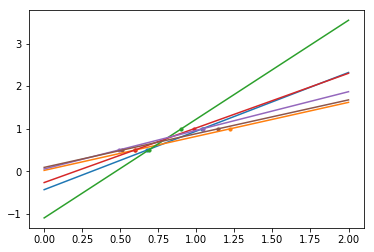

In [109]:
X = np.c_[.5, 1].T
y = [.5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=10)

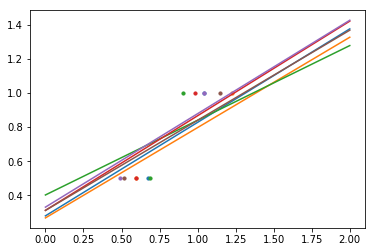

In [117]:
regr = linear_model.Ridge(alpha=0.1)

plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=10)

In [128]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])

[0.5851110683883529, 0.5852073015444674, 0.5854677540698493, 0.5855512036503915, 0.5830717085554162, 0.570589994372801]


In [143]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
print(regr.fit(diabetes_X_train, diabetes_y_train))
print(regr.coef_)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


In [148]:
log = linear_model.LogisticRegression(solver='lbfgs', C=1e5, multi_class='multinomial')
print(log.fit(iris_X_train, iris_y_train))
log.predict(iris_X_test)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)


array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

### 3. Support vector machines (SVMs)

In [153]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
print(svc.fit(iris_X_train, iris_y_train))
svc.predict(iris_X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])